<a href="https://colab.research.google.com/github/mubinui/DeepLearning/blob/main/DressDetection01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Clothing items** detection 

In [2]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

Loading dataset from keras 

In [3]:
data_set = tf.keras.datasets.fashion_mnist

In [11]:
(X_train, y_train), (X_test, y_test) = data_set.load_data()
X_train = X_train/255
X_test = X_test/255

In [12]:
print(len(X_train))
print(len(X_test))
print(X_train[0].shape)
print(len(y_train))

60000
10000
(28, 28)
60000


In [13]:
#Looking up the data 
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

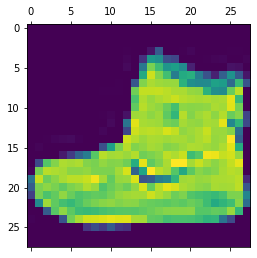

In [29]:
#Plotting the image
plt.matshow(X_train[0])

In [15]:
print(y_train[0:30])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4]


<big> Lets try a neural network with two layers <big>

In [18]:
clothing_model = keras.Sequential([
                                   keras.layers.Flatten(input_shape=(28,28)),
                                   keras.layers.Dense(128,activation='relu'),
                                   keras.layers.Dense(10, activation= 'sigmoid')
])
clothing_model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)

In [19]:
clothing_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4972 - accuracy: 0.8271
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3716 - accuracy: 0.8665
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3359 - accuracy: 0.8768
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3124 - accuracy: 0.8859
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2932 - accuracy: 0.8910
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2816 - accuracy: 0.8952
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2677 - accuracy: 0.9001
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2583 - accuracy: 0.9035
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2469 - accuracy: 0.9083
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

In [59]:
#Evaluating the model 
clothing_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1084 - accuracy: 0.8896


[1.1083811521530151, 0.8895999789237976]

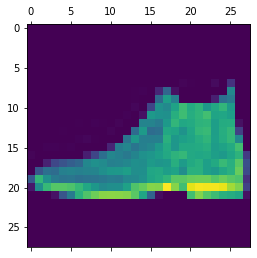

In [21]:
plt.matshow(X_test[0])

In [28]:
#Generating the predicted y values 
y_predicted = clothing_model.predict(X_test)
print(y_predicted[0])
np.argmax(y_predicted[0])

[6.0400220e-13 5.5442985e-07 2.5495942e-11 2.2238456e-08 2.7156962e-11
 1.4364042e-02 1.4133061e-08 6.1808670e-01 1.6712578e-07 9.9511069e-01]


9

In [23]:
#Lets create a confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [24]:
confusion = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
confusion 

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[802,   2,  22,  34,   4,   0, 127,   0,   9,   0],
       [  3, 973,   2,  14,   3,   0,   3,   0,   2,   0],
       [ 15,   1, 838,  10,  75,   0,  59,   0,   2,   0],
       [ 12,  13,  10, 915,  29,   0,  17,   0,   4,   0],
       [  1,   1, 109,  25, 808,   0,  55,   0,   1,   0],
       [  0,   0,   0,   1,   0, 970,   0,  16,   1,  12],
       [ 71,   1,  88,  37,  62,   0, 727,   0,  14,   0],
       [  0,   0,   0,   0,   0,  19,   0, 965,   0,  16],
       [  2,   0,   1,   3,   5,   4,   5,   3, 977,   0],
       [  0,   0,   0,   0,   0,   8,   0,  52,   0, 940]], dtype=int32)>

Text(69.0, 0.5, 'Given')

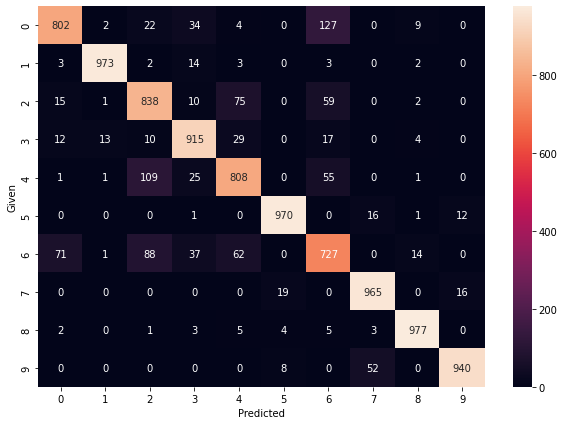

In [25]:
#showing the heat map 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Given')

<h3> Lets train the model with <b>3 hidden layer<h3>

In [26]:
clothing_model = keras.Sequential([
                                   keras.layers.Flatten(input_shape=(28,28)),
                                   keras.layers.Dense(400, activation='relu'),
                                   keras.layers.Dense(400, activation='relu'),
                                   keras.layers.Dense(400, activation='relu'),
                                   keras.layers.Dense(400, activation='relu'),
                                   keras.layers.Dense(10, activation='sigmoid')
])
clothing_model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)
clothing_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4992 - accuracy: 0.8187
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3753 - accuracy: 0.8644
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3406 - accuracy: 0.8744
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3168 - accuracy: 0.8821
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2963 - accuracy: 0.8905
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2828 - accuracy: 0.8954
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2716 - accuracy: 0.8974
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2596 - accuracy: 0.9027
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2485 - accuracy: 0.9064
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.242

In [27]:
#Evaluating the model 
clothing_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8842


[0.39858701825141907, 0.8841999769210815]

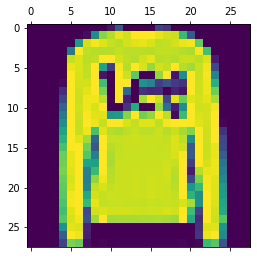

In [31]:
plt.matshow(X_test[1])

In [32]:
#Generating the predicted y values 
y_predicted = clothing_model.predict(X_test)
print(y_predicted[1])
np.argmax(y_predicted[1])

[1.30500317e-01 1.58380313e-08 9.99111354e-01 3.83380757e-06
 1.75890893e-01 1.19886574e-18 1.20258726e-01 5.91649667e-22
 8.89221408e-09 3.20129474e-22]


2

In [33]:
#Lets create a confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [34]:
confusion = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
confusion 

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[899,   0,  16,  23,   2,   1,  53,   0,   6,   0],
       [  3, 974,   0,  17,   2,   0,   4,   0,   0,   0],
       [  9,   0, 870,  16,  42,   0,  63,   0,   0,   0],
       [ 28,   1,   8, 930,  15,   0,  14,   0,   4,   0],
       [  1,   1, 172,  51, 667,   0, 108,   0,   0,   0],
       [  0,   0,   0,   0,   0, 965,   0,  23,   1,  11],
       [190,   0,  99,  27,  43,   0, 631,   0,  10,   0],
       [  0,   0,   0,   0,   0,   7,   0, 968,   0,  25],
       [  5,   0,   1,   3,   2,   1,   7,   7, 974,   0],
       [  0,   0,   0,   0,   0,   4,   1,  31,   0, 964]], dtype=int32)>

Text(69.0, 0.5, 'Given')

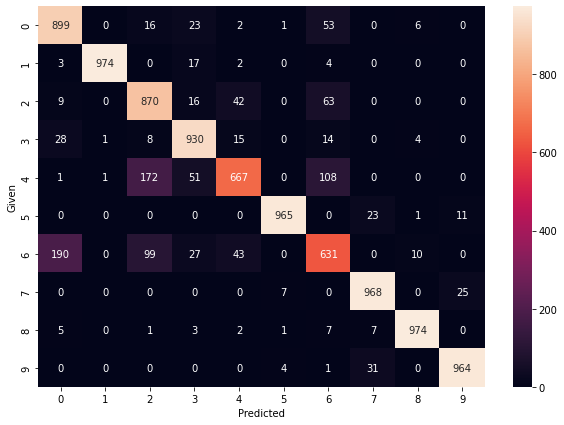

In [35]:
#showing the heat map 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Given')

In [41]:
clothing_model = keras.Sequential([
                                   keras.layers.Flatten(input_shape=(28,28)),
                                   keras.layers.Dense(128, activation='relu'),
                                   keras.layers.Dense(256, activation='relu'), 
                                   keras.layers.Dense(10, activation='sigmoid')
])
clothing_model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)
clothing_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4807 - accuracy: 0.8275
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3614 - accuracy: 0.8677
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3265 - accuracy: 0.8796
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3004 - accuracy: 0.8884
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2867 - accuracy: 0.8921
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.8997
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2574 - accuracy: 0.9027
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2458 - accuracy: 0.9073
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2351 - accuracy: 0.9109
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - l

In [53]:
#Evaluating the model 
clothing_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1084 - accuracy: 0.8896


[1.1083811521530151, 0.8895999789237976]

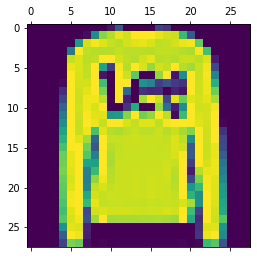

In [54]:
plt.matshow(X_test[1])

In [55]:
#Generating the predicted y values 
y_predicted = clothing_model.predict(X_test)
print(y_predicted[1])
np.argmax(y_predicted[1])

[2.0124251e-06 0.0000000e+00 9.9999940e-01 3.0962363e-24 1.3534520e-03
 2.4459780e-27 1.3111482e-02 0.0000000e+00 1.3812437e-27 0.0000000e+00]


2

In [56]:
#Lets create a confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [57]:
confusion = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
confusion 

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[852,   1,  15,  41,   1,   0,  84,   0,   6,   0],
       [  2, 971,   2,  16,   4,   0,   4,   0,   1,   0],
       [ 20,   0, 811,  12,  88,   0,  68,   0,   1,   0],
       [ 14,   7,   6, 923,  23,   0,  25,   0,   2,   0],
       [  4,   0,  84,  37, 821,   0,  53,   0,   1,   0],
       [  2,   0,   0,   2,   0, 954,   0,  25,   2,  15],
       [119,   0,  62,  37, 106,   0, 668,   0,   8,   0],
       [  0,   0,   0,   0,   0,   8,   0, 967,   1,  24],
       [  6,   0,   3,   6,   9,   1,   2,   3, 970,   0],
       [  0,   0,   0,   0,   0,   7,   1,  33,   0, 959]], dtype=int32)>

Text(69.0, 0.5, 'Given')

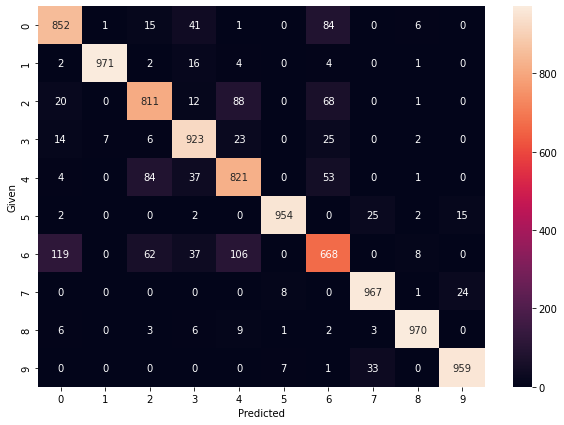

In [58]:
#showing the heat map 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Given')